In [ ]:
import pandas as pd

# Load the CICIDS2017 dataset

df = pd.read_csv('sample_data/dataset.csv')

# View the first few rows
print(df.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

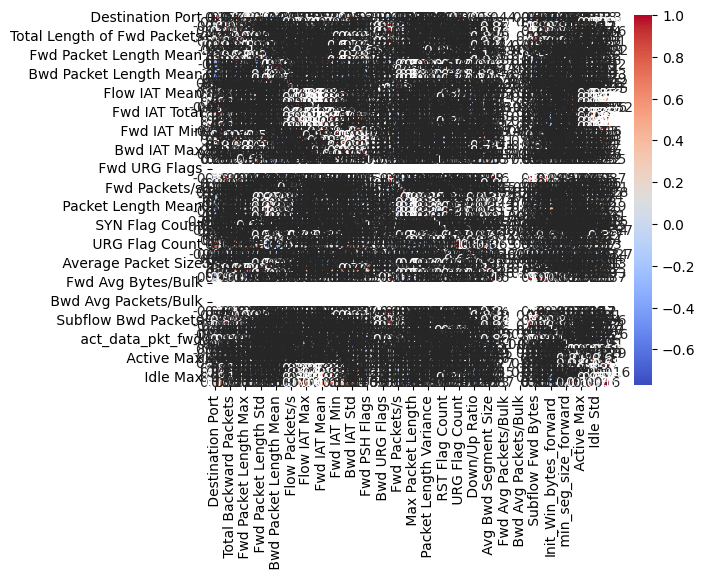

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CICIDS2017 dataset
df = pd.read_csv('sample_data/dataset.csv')

# View the first few rows
print(df.head())
print(df.info())
print(df.describe())

# Select only numeric features for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric features only
corr_matrix = numeric_df.corr()

# Heatmap for correlation between numeric features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

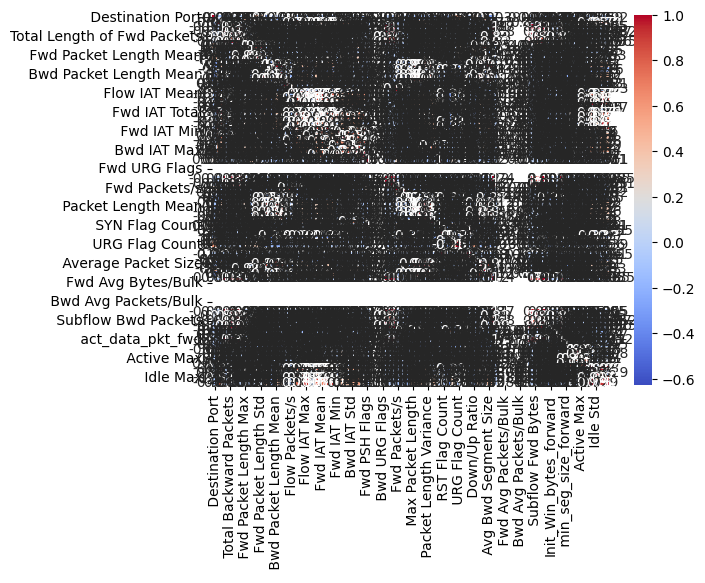

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Load the CICIDS2017 dataset
df = pd.read_csv('sample_data/dataset.csv')

# View the first few rows
print(df.head())
print(df.info())
print(df.describe())

# Select only numeric features for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric features only
corr_matrix = numeric_df.corr()

# Heatmap for correlation between numeric features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [ ]:
df['packet_size_ratio'] = df[' Total Fwd Packets'] / df[' Total Backward Packets']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

features = df.drop(columns=[' Flow Duration',' Label'])

features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)

poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(features)

print("Original features shape: ", features.shape)
print("Polynomial features shape: ", poly_features.shape)

Original features shape:  (496079, 78)
Polynomial features shape:  (496079, 78)


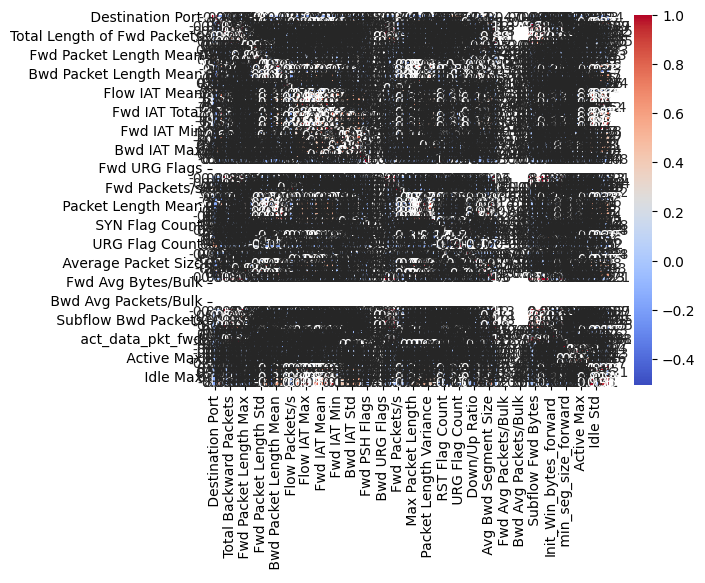

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt


# Load the CICIDS2017 dataset
df = pd.read_csv('sample_data/dataset.csv')

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric features only
corr_matrix = numeric_df.corr()
# Now, corr_matrix should be calculated only on numeric columns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold

features = df.drop(columns=[' Flow Duration',' Label'])

# Replace infinite values with NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaN values in either features or the target variable
features = features.dropna()  # Drop NaNs in features
df = df.dropna(subset=[' Label']) # Drop rows in df where ' Label' is NaN
df = df[df.index.isin(features.index)] # Keep only rows in df that are also in features

poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(features)

print("Original features shape: ", features.shape)
print("Polynomial features shape: ", poly_features.shape)

selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(features)
print("Selected features shape:", selected_features.shape)


Original features shape:  (1041899, 77)
Polynomial features shape:  (1041899, 77)
Selected features shape: (1041899, 61)


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Load the CICIDS2017 dataset (assuming 'dataset.csv' is your file)
df = pd.read_csv('sample_data/dataset.csv')  # Add this line to load the dataframe

# Create a smaller sample of the dataset
sample_size = 10000  # Adjust as needed
df_sample = df.sample(n=sample_size, random_state=42) # Use a random state for reproducibility
features_sample = df_sample.drop(columns=[' Flow Duration', ' Label'])

# Replace infinite values with NaN
features_sample.replace([np.inf, -np.inf], np.nan, inplace=True)
# Replace very large values with a finite value or drop the rows
# Option 1: Replace with a large finite value
features_sample.clip(lower=-1e10, upper=1e10, inplace=True)
# Option 2: Drop rows with large values (be careful - you may lose data)
# features_sample = features_sample[(features_sample < 1e10).all(axis=1)]

# Initialize the model with parallel processing
model = RandomForestClassifier(n_jobs=-1)
# Remove n_jobs from RFE initialization
rfe = RFE(model, n_features_to_select=5)

# Fit the RFE model to the sample data
# The underlying estimator (model) will use n_jobs=-1 for parallel processing
rfe.fit(features_sample, df_sample[' Label'])

print("Selected features (RFE):", rfe.support_)
print("Feature ranking:", rfe.ranking_)

# Apply selected features to the original dataset if needed
selected_feature_indices = [i for i, selected in enumerate(rfe.support_) if selected]
selected_features_names = features_sample.columns[selected_feature_indices] # Use features_sample columns
features_selected = features_sample[selected_features_names] # Use features_sample to select

Selected features (RFE): [False False False  True False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False  True False  True False False False False False False False
 False False False False False]
Feature ranking: [19 17 38  1 13  4 46  9 15  6 30  1  2  8 27 28 26 20 44 36 35 34  5 42
 53 45 55 50 49 61 71 67 65 11 18 41 23 43 22 12 10 14 47 60 63 24 40 57
 73 70 58  1  7  3 25 72 69 64 62 68 66 29  1 32  1 31 16 21 51 48 56 52
 54 37 59 39 33]


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

# Load the dataset
df = pd.read_csv('sample_data/dataset.csv')

# Feature selection (VarianceThreshold)
# Drop the specified columns and replace infinite values with NaN
features = df.drop(columns=[' Flow Duration', ' Label'])
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Clip extremely large values to a manageable range
# This will replace values outside the range with the boundary values
features = features.clip(lower=-1e10, upper=1e10)

# Drop rows with any remaining NaN values to ensure clean data
features.dropna(inplace=True)

# Apply VarianceThreshold to the preprocessed features
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(features)

# Ensure the original DataFrame is aligned with the selected features
df = df[df.index.isin(features.index)]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, df[' Label'], test_size=100, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"IDS Accuracy: {accuracy:.4f}")

IDS Accuracy: 1.0000


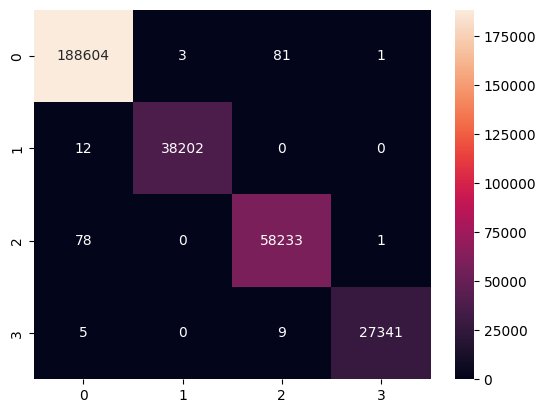

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
